# Avaliação e Previsão de Agentes e Fenômenos que Mais Causam Impactos Socioeconômicos na Região Sudeste do Brasil

# Sumário
0. [Instalação das Dependências](#instalar)
1. [Importação das Bibliotecas](#bibliotecas)
2. [Importação das Bases de Dados](#bases)
3. [Análise dos Dados antes do Tratamento](#analise1)
4. [Tratamento dos Dados](#tratamento)
5. [Análise Exploratória dos Dados](#analise2)
6. [Avaliação e Classificação da Base de Dados](#avaliacao)
7. [Aplicação de Modelos de Previsão na Base de Dados](#modelo)
8. [Resultados](#resultado)
9. [Conclusões](#conclusao)


# **0.** Instalação das Dependências
<a id="instalar"></a>

In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1.** Importação das Bibliotecas
<a id="bibliotecas"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
#from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **2.** Importação das Bases de Dados
<a id="bases"></a>

In [3]:
rend_trabalho = pd.read_csv('../data/raw/Indic_Geo_Rend.csv', comment=None , header=1)
ind_trabalho = pd.read_csv('../data/raw/Indic_Geo.csv', comment=None , header=1)
gini = pd.read_csv('../data/raw/Indice_Gini_Geo.csv', comment=None , header=1)
nivel_instrucao = pd.read_csv('../data/raw/Instr_Geo.csv', comment=None , header=1)
populacao = pd.read_csv('../data/raw/Pop_Geo.csv', comment=None , header=1)
saneamento = pd.read_csv('../data/raw/Sane_Geo_pes.csv', comment=None , header=1)
analfabetos = pd.read_csv('../data/raw/TaxaAnalf_Geo.csv', comment=None , header=1)
mortalidade = pd.read_csv('../data/raw/TaxaMort_Geo.csv', comment=None , header=1)
plano = pd.read_csv('../data/raw/Benef_Plano_Geo.csv', comment=None , header=1)
leitos = pd.read_csv('../data/raw/Leit_IntTot_Geo.csv', comment=None , header=1)
ocupacao = pd.read_csv('../data/raw/CondOcup_Geo.csv', comment=None , header=1)

## Visualização das Bases de Dados

In [4]:
display(rend_trabalho)

,Estado,Ano,Rendimento médio real habitual do trabalho principal(R$/mês),Rendimento médio real habitual de todos os trabalhos(R$/mês),Rendimento-hora médio real habitual do trabalho principal(R$/hora),Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t
0,Rondônia,2023,2636,2695,18.0,18.0
1,Acre,2023,2338,2358,15.0,15.0
2,Amazonas,2023,2308,2367,14.4,14.4
3,Roraima,2023,2701,2791,16.7,16.6
4,Pará,2023,2176,2265,13.8,13.8
...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,3110,3211,18.9,18.9
131,Mato Grosso do Sul,2019,2910,3011,18.2,18.2
132,Mato Grosso,2019,2781,2846,17.4,17.2
133,Goiás,2019,2530,2597,15.2,15.2


In [5]:
display(ind_trabalho)

,Estado,Ano,População em idade de trabalhar,População na força de trabalho,População ocupada,População ocupada em trabalhos formais,População desocupada,População na força de trabalho potencial,População subutilizada,Taxa de participação,Nível de ocupação,Taxa de formalização,Taxa de desocupação,Taxa composta de subutilização
0,Rondônia,2023,1496,851,824,486,27,19.00,56.0,56.9,55.1,59.0,3.2,6.5
1,Acre,2023,691,342,316,152,25,36.00,68.0,49.4,45.7,48.0,7.5,18.0
2,Amazonas,2023,3182,1946,1752,703,194,139.00,424.0,61.2,55.1,40.1,9.9,20.3
3,Roraima,2023,449,280,262,120,18,13.38,62.5,58.4,45.7,6.6,12.8,NaN
4,Pará,2023,6862,4194,3869,1449,325,476.00,1123.0,61.1,56.4,37.4,7.7,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,9396,6280,5788,4045,492,219.00,1011.0,66.8,61.6,69.9,7.8,15.6
131,Mato Grosso do Sul,2019,2113,1460,1345,778,116,88.00,276.0,69.1,63.6,57.8,7.9,17.8
132,Mato Grosso,2019,2649,1845,1694,1006,151,85.00,309.0,69.6,63.9,59.4,8.2,16.0
133,Goiás,2019,5643,3817,3409,1933,408,179.00,731.0,67.6,60.4,56.7,10.7,18.3


In [6]:
display(gini)

,Estado,Ano,Índice Gini
0,Rondônia,2023,0.455
1,Acre,2023,0.511
2,Amazonas,2023,0.512
3,Roraima,2023,0.520
4,Pará,2023,0.501
...,...,...,...
131,Rio Grande do Sul,2019,0.482
132,Mato Grosso do Sul,2019,0.483
133,Mato Grosso,2019,0.454
134,Goiás,2019,0.460


In [7]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [8]:
display(populacao)

,Estado,Ano,População
0,Acre,2019,865
1,Alagoas,2019,3330
2,Amazonas,2019,3983
3,Amapá,2019,838
4,Bahia,2019,14854
...,...,...,...
130,Rio Grande do Sul,2023,11206
131,Santa Catarina,2023,7913
132,Sergipe,2023,2282
133,São Paulo,2023,45846


In [9]:
display(saneamento)

,Estado,Ano,Saneamento Basico Total(1 000 pessoas),Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)
0,Rondônia,2019,1841.0,22.7
1,Acre,2023,914.0,37.8
2,Amazonas,2023,4221.0,43.6
3,Roraima,2023,610.0,54.6
4,Pará,2023,8902.0,18.4
...,...,...,...,...
130,Rio Grande do Sul,2019,11359.0,68.4
131,Mato Grosso do Sul,2019,2709.0,49.9
132,Mato Grosso,2019,3431.0,36.9
133,Goiás,2019,7021.0,59.6


In [10]:
display(analfabetos)

,Estado,Ano,Taxa de Analfabetismo
0,Rondônia,2023,5.1
1,Acre,2023,9.4
2,Amazonas,2023,5.1
3,Roraima,2023,4.2
4,Pará,2023,6.9
...,...,...,...
130,Rio Grande do Sul,2019,2.4
131,Mato Grosso do Sul,2019,4.6
132,Mato Grosso,2019,5.6
133,Goiás,2019,4.6


In [11]:
display(mortalidade)

,Estado,Ano,Taxa Total Mortalidade,0 a 14 anos,15 a 29 anos,30 a 44 anos,45 a 59 anos,60 anos ou mais,60 a 69 anos,70 anos ou mais
0,Rondônia,2023,5.73,1.10,1.48,2.31,5.45,29.98,14.45,53.54
1,Acre,2023,4.78,1.54,1.32,2.10,5.11,30.23,13.93,52.75
2,Amazonas,2023,4.80,1.53,1.60,2.42,5.34,29.47,14.13,52.66
3,Roraima,2023,4.74,2.52,1.57,2.46,5.75,28.21,14.66,49.97
4,Pará,2023,5.08,1.33,1.44,2.26,4.94,28.61,13.43,49.27
...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,7.97,0.94,1.13,1.95,5.66,33.60,15.17,56.90
131,Mato Grosso do Sul,2019,6.06,1.08,1.22,2.07,5.81,32.07,14.83,55.31
132,Mato Grosso,2019,5.16,1.26,1.37,2.15,5.47,29.16,14.62,51.07
133,Goiás,2019,5.88,1.16,1.46,2.14,5.33,30.99,14.38,53.79


In [12]:
display(leitos)

,Estado,Ano,Número mensal médio de leitos de internação (total)
0,Rondônia,2019,4477
1,Acre,2019,1469
2,Amazonas,2019,5701
3,Roraima,2019,1071
4,Pará,2019,14412
...,...,...,...
130,Rio Grande do Sul,2023,29615
131,Mato Grosso do Sul,2023,5907
132,Mato Grosso,2023,7533
133,Goiás,2023,18728


In [13]:
display(plano)

,Estado,T1 2019,T2 2019,T3 2019,T4 2019,T1 2020,T2 2020,T3 2020,T4 2020,T1 2021,...,T3 2021,T4 2021,T1 2022,T2 2022,T3 2022,T4 2022,T1 2023,T2 2023,T3 2023,T4 2023
0,Rondônia,99941,104567,104202,103809,105345,107436,106437,112245,109397,...,109470,109143,110414,111001,112095,112299,113119,115597,116071,120689
1,Acre,15112,14374,14409,15464,15573,15018,15544,15774,15552,...,16825,16934,17300,17219,17282,17279,17062,17349,18595,19973
2,Amazonas,400005,409042,415795,430642,439485,421017,439357,457801,459628,...,462127,490663,497536,505700,515848,509477,542588,549525,553702,558178
3,Roraima,9213,9476,9812,10665,10803,10289,10805,11289,10825,...,10972,10730,10902,11118,11045,11491,11372,11631,11768,11691
4,Pará,410263,417289,414379,426214,428410,418499,440902,457614,460211,...,505659,506517,499187,514505,508455,509878,510563,518613,525875,538871
5,Amapá,43889,43420,44229,44497,44445,44021,45834,48269,48598,...,49644,49510,48457,48235,50965,52097,51416,50313,47846,48172
6,Tocantins,49181,120511,121949,126251,126445,111537,62062,63728,63182,...,130005,130278,129395,119472,120848,121521,122139,121469,124778,127249
7,Maranhão,197051,194141,195059,201519,206131,199345,214092,223894,224574,...,240966,245027,252267,265950,272590,281604,287596,293209,314189,324883
8,Piauí,84202,84390,85628,91800,96288,89132,93756,105918,108355,...,120771,128841,130013,138822,145142,151008,157527,169434,179582,191980
9,Ceará,951107,964397,944408,966518,992173,958343,979538,996734,1022691,...,1020264,1048814,1051472,1088977,1126009,1157246,1174417,1194993,1222830,1321364


In [14]:
display(ocupacao)

,Estado,Ano,Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas),Domicílio Próprio - já pago,Domicílio Próprio - pagando,Domicílio Alugado,Domicílio Cedido por empregador,Domicílio Cedido por familiar,Domicílio Cedido de outra forma,Outra Forma
0,Rondônia,2023,1841.0,68.8,1.5,19.9,2.0,6.2,1.5,0.1
1,Acre,2023,914.0,79.8,0.7,10.2,2.0,6.4,0.6,0.3
2,Amazonas,2023,4221.0,73.8,1.9,15.5,0.7,7.2,0.7,0.1
3,Roraima,2023,610.0,59.0,2.8,26.1,2.7,7.7,1.7,0.1
4,Pará,2023,8902.0,74.1,3.0,13.5,1.4,6.8,0.8,0.3
...,...,...,...,...,...,...,...,...,...,...
131,Rio Grande do Sul,2019,11359.0,68.6,8.9,15.2,1.0,5.2,0.8,0.4
132,Mato Grosso do Sul,2019,2709.0,51.9,11.5,21.8,5.9,7.8,0.8,0.2
133,Mato Grosso,2019,3431.0,60.0,6.1,23.0,5.2,4.7,0.9,0.3
134,Goiás,2019,7021.0,54.5,11.1,23.1,3.1,7.2,0.7,0.4


# **3.** Análise dos Dados antes do Tratamento
<a id="analise1"></a>

## Verificação do Tamanho das Colunas e Linhas das Bases de Dados

In [15]:
rend_trabalho.shape

(135, 6)

In [16]:
ind_trabalho.shape

(135, 14)

In [17]:
gini.shape

(136, 3)

In [18]:
nivel_instrucao.shape

(135, 7)

In [19]:
populacao.shape

(135, 3)

In [20]:
saneamento.shape

(135, 4)

In [21]:
analfabetos.shape

(135, 3)

In [22]:
mortalidade.shape

(135, 10)

In [23]:
leitos.shape

(135, 3)

In [24]:
plano.shape

(27, 21)

In [25]:
ocupacao.shape

(136, 10)

Ao analisar as bases, observa-se que elas possuem, em média, 135 linhas e 7 colunas. No entanto, como essas bases contêm informações de todos os estados do Brasil, optou-se por filtrá-las para incluir apenas os dados referentes à região Sudeste, afim de tornar a análise mais focada e relevante. <br>
Além disso, a base `plano` possui um volume de dados muito superior ao das demais, visto que fornece informações sobre o número de beneficiários por plano de saúde em periodicidade trimestral, diferente das outras bases. Portanto, será necessário o tratamento desses dados para manter o padrão anual.


---



## Verificação de Valores Nulos nas Bases de Dados


In [26]:
rend_trabalho.isnull().sum()

Estado                                                                  0
Ano                                                                     0
Rendimento médio real habitual do trabalho principal(R$/mês)            0
Rendimento médio real habitual de todos os trabalhos(R$/mês)            0
Rendimento-hora médio real habitual do trabalho principal(R$/hora)      0
Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t    0
dtype: int64

In [27]:
ind_trabalho.isnull().sum()

Estado                                       0
Ano                                          0
População em idade de trabalhar              0
População na força de trabalho               0
População ocupada                            0
População ocupada em trabalhos formais       0
População desocupada                         0
População na força de trabalho potencial     0
População subutilizada                       0
Taxa de participação                         0
Nível de ocupação                            0
Taxa de formalização                         0
Taxa de desocupação                          0
Taxa composta de subutilização              29
dtype: int64

In [28]:
(ind_trabalho.isnull().sum() / len(ind_trabalho)) * 100

Estado                                       0.000000
Ano                                          0.000000
População em idade de trabalhar              0.000000
População na força de trabalho               0.000000
População ocupada                            0.000000
População ocupada em trabalhos formais       0.000000
População desocupada                         0.000000
População na força de trabalho potencial     0.000000
População subutilizada                       0.000000
Taxa de participação                         0.000000
Nível de ocupação                            0.000000
Taxa de formalização                         0.000000
Taxa de desocupação                          0.000000
Taxa composta de subutilização              21.481481
dtype: float64

In [29]:
gini.isnull().sum()

Estado         0
Ano            0
Índice Gini    0
dtype: int64

In [30]:
nivel_instrucao.isnull().sum()

Estado                                             0
Ano                                                0
Total Pessoas Ocupadas(1 000 pessoas)              0
Sem instrução ou fundamental incompleto            0
Ensino fundamental completo ou médio incompleto    0
Ensino médio completo ou superior incompleto       0
Ensino superior completo                           0
dtype: int64

In [31]:
populacao.isnull().sum()

Estado       0
Ano          0
População    0
dtype: int64

In [32]:
saneamento.isnull().sum()

Estado                                                                                   0
Ano                                                                                      0
Saneamento Basico Total(1 000 pessoas)                                                  54
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    54
dtype: int64

In [33]:
(saneamento.isnull().sum() / len(saneamento)) * 100

Estado                                                                                   0.0
Ano                                                                                      0.0
Saneamento Basico Total(1 000 pessoas)                                                  40.0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    40.0
dtype: float64

In [34]:
analfabetos.isnull().sum()

Estado                    0
Ano                       0
Taxa de Analfabetismo    54
dtype: int64

In [35]:
(analfabetos.isnull().sum() / len(analfabetos)) * 100

Estado                    0.0
Ano                       0.0
Taxa de Analfabetismo    40.0
dtype: float64

In [36]:
mortalidade.isnull().sum()

Estado                    0
Ano                       0
Taxa Total Mortalidade    0
0 a 14 anos               0
15 a 29 anos              0
30 a 44 anos              0
45 a 59 anos              0
60 anos ou mais           0
60 a 69 anos              0
70 anos ou mais           0
dtype: int64

In [37]:
leitos.isnull().sum()

Estado                                                 0
Ano                                                    0
Número mensal médio de leitos de internação (total)    0
dtype: int64

In [38]:
plano.isnull().sum()

Estado     0
T1 2019    0
T2 2019    0
T3 2019    0
T4 2019    0
T1 2020    0
T2 2020    0
T3 2020    0
T4 2020    0
T1 2021    0
T2 2021    0
T3 2021    0
T4 2021    0
T1 2022    0
T2 2022    0
T3 2022    0
T4 2022    0
T1 2023    0
T2 2023    0
T3 2023    0
T4 2023    0
dtype: int64

In [39]:
ocupacao.isnull().sum()

Estado                                                                0
Ano                                                                   0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    54
Domicílio Próprio - já pago                                          54
Domicílio Próprio - pagando                                          54
Domicílio Alugado                                                    54
Domicílio Cedido por empregador                                      54
Domicílio Cedido por familiar                                        54
Domicílio Cedido de outra forma                                      54
Outra Forma                                                          57
dtype: int64

In [40]:
(ocupacao.isnull().sum() / len(ocupacao)) * 100

Estado                                                                0.000000
Ano                                                                   0.000000
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    39.705882
Domicílio Próprio - já pago                                          39.705882
Domicílio Próprio - pagando                                          39.705882
Domicílio Alugado                                                    39.705882
Domicílio Cedido por empregador                                      39.705882
Domicílio Cedido por familiar                                        39.705882
Domicílio Cedido de outra forma                                      39.705882
Outra Forma                                                          41.911765
dtype: float64

Ao analisar os dados, observa-se que algumas bases apresentam proporções significativas de valores nulos. Especificamente, a base `ind_trabalho`, que possui aproximadamente 21% de dados faltantes em sua coluna, enquanto as bases  `analfabetos`, `saneamento` e `ocupacao` apresentam um índice ainda maior, de aproximadamente 40% em cada. Esses dados ausentes podem afetar a confiabilidade dos resultados e a interpretação das informações contidas nessas bases. Diante disso, um tratamento deles será necessário.

---



## Visualização dos Tipos de Dados em Cada Base

In [41]:
rend_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Estado                                                               135 non-null    object 
 1   Ano                                                                  135 non-null    int64  
 2   Rendimento médio real habitual do trabalho principal(R$/mês)         135 non-null    int64  
 3   Rendimento médio real habitual de todos os trabalhos(R$/mês)         135 non-null    int64  
 4   Rendimento-hora médio real habitual do trabalho principal(R$/hora)   135 non-null    float64
 5   Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)	  135 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 6.5+ KB


In [42]:
ind_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado                                    135 non-null    object 
 1   Ano                                       135 non-null    int64  
 2   População em idade de trabalhar           135 non-null    int64  
 3   População na força de trabalho            135 non-null    int64  
 4   População ocupada                         135 non-null    int64  
 5   População ocupada em trabalhos formais    135 non-null    int64  
 6   População desocupada                      135 non-null    int64  
 7   População na força de trabalho potencial  135 non-null    float64
 8   População subutilizada                    135 non-null    float64
 9   Taxa de participação                      135 non-null    float64
 10  Nível de ocupação                     

In [43]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estado       136 non-null    object 
 1   Ano          136 non-null    int64  
 2   Índice Gini  136 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [44]:
nivel_instrucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Estado                                           135 non-null    object 
 1   Ano                                              135 non-null    int64  
 2   Total Pessoas Ocupadas(1 000 pessoas)            135 non-null    int64  
 3   Sem instrução ou fundamental incompleto          135 non-null    float64
 4   Ensino fundamental completo ou médio incompleto  135 non-null    float64
 5   Ensino médio completo ou superior incompleto     135 non-null    float64
 6   Ensino superior completo                         135 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 7.5+ KB


In [45]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estado     135 non-null    object
 1   Ano        135 non-null    int64 
 2   População  135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [46]:
saneamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Estado                                                                                135 non-null    object 
 1   Ano                                                                                   135 non-null    int64  
 2   Saneamento Basico Total(1 000 pessoas)                                                81 non-null     float64
 3   Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)  81 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


In [47]:
analfabetos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estado                 135 non-null    object 
 1   Ano                    135 non-null    int64  
 2   Taxa de Analfabetismo  81 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [48]:
mortalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estado                  135 non-null    object 
 1   Ano                     135 non-null    object 
 2   Taxa Total Mortalidade  135 non-null    float64
 3   0 a 14 anos             135 non-null    float64
 4   15 a 29 anos            135 non-null    float64
 5   30 a 44 anos            135 non-null    float64
 6   45 a 59 anos            135 non-null    float64
 7   60 anos ou mais         135 non-null    float64
 8   60 a 69 anos            135 non-null    float64
 9   70 anos ou mais         135 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.7+ KB


In [49]:
leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Estado                                               135 non-null    object
 1   Ano                                                  135 non-null    int64 
 2   Número mensal médio de leitos de internação (total)  135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [50]:
plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Estado   27 non-null     object
 1   T1 2019  27 non-null     int64 
 2   T2 2019  27 non-null     int64 
 3   T3 2019  27 non-null     int64 
 4   T4 2019  27 non-null     int64 
 5   T1 2020  27 non-null     int64 
 6   T2 2020  27 non-null     int64 
 7   T3 2020  27 non-null     int64 
 8   T4 2020  27 non-null     int64 
 9   T1 2021  27 non-null     int64 
 10  T2 2021  27 non-null     int64 
 11  T3 2021  27 non-null     int64 
 12  T4 2021  27 non-null     int64 
 13  T1 2022  27 non-null     int64 
 14  T2 2022  27 non-null     int64 
 15  T3 2022  27 non-null     int64 
 16  T4 2022  27 non-null     int64 
 17  T1 2023  27 non-null     int64 
 18  T2 2023  27 non-null     int64 
 19  T3 2023  27 non-null     int64 
 20  T4 2023  27 non-null     int64 
dtypes: int64(20), object(1)
memory usage: 4.6

In [51]:
ocupacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Estado                                                             136 non-null    object 
 1   Ano                                                                136 non-null    int64  
 2   Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)  82 non-null     float64
 3   Domicílio Próprio - já pago                                        82 non-null     float64
 4   Domicílio Próprio - pagando                                        82 non-null     float64
 5   Domicílio Alugado                                                  82 non-null     float64
 6   Domicílio Cedido por empregador                                    82 non-null     float64
 7   Domicílio Cedido por famil

# *4.* Tratamento dos Dados
<a id="tratamento"></a>

## Filtração dos Dados para Apenas a Região Sudeste do Brasil

In [52]:
rend_trabalho = rend_trabalho[(rend_trabalho['Estado'] == 'Minas Gerais') | (rend_trabalho['Estado'] == 'Espírito Santo') | (rend_trabalho['Estado'] == 'Rio de Janeiro') | (rend_trabalho['Estado'] == 'São Paulo')]
ind_trabalho = ind_trabalho[(ind_trabalho['Estado'] == 'Minas Gerais') | (ind_trabalho['Estado'] == 'Espírito Santo') | (ind_trabalho['Estado'] == 'Rio de Janeiro') | (ind_trabalho['Estado'] == 'São Paulo')]
gini = gini[(gini['Estado'] == 'Minas Gerais') | (gini['Estado'] == 'Espírito Santo') | (gini['Estado'] == 'Rio de Janeiro') | (gini['Estado'] == 'São Paulo')]
nivel_instrucao = nivel_instrucao[(nivel_instrucao['Estado'] == 'Minas Gerais') | (nivel_instrucao['Estado'] == 'Espírito Santo') | (nivel_instrucao['Estado'] == 'Rio de Janeiro') | (nivel_instrucao['Estado'] == 'São Paulo')]
populacao = populacao[(populacao['Estado'] == 'Minas Gerais') | (populacao['Estado'] == 'Espírito Santo') | (populacao['Estado'] == 'Rio de Janeiro') | (populacao['Estado'] == 'São Paulo')]
saneamento = saneamento[(saneamento['Estado'] == 'Minas Gerais') | (saneamento['Estado'] == 'Espírito Santo') | (saneamento['Estado'] == 'Rio de Janeiro') | (saneamento['Estado'] == 'São Paulo')]
analfabetos = analfabetos[(analfabetos['Estado'] == 'Minas Gerais') | (analfabetos['Estado'] == 'Espírito Santo') | (analfabetos['Estado'] == 'Rio de Janeiro') | (analfabetos['Estado'] == 'São Paulo')]
mortalidade = mortalidade[(mortalidade['Estado'] == 'Minas Gerais') | (mortalidade['Estado'] == 'Espírito Santo') | (mortalidade['Estado'] == 'Rio de Janeiro') | (mortalidade['Estado'] == 'São Paulo')]
leitos = leitos[(leitos['Estado'] == 'Minas Gerais') | (leitos['Estado'] == 'Espírito Santo') | (leitos['Estado'] == 'Rio de Janeiro') | (leitos['Estado'] == 'São Paulo')]
plano = plano[(plano['Estado'] == 'Minas Gerais') | (plano['Estado'] == 'Espírito Santo') | (plano['Estado'] == 'Rio de Janeiro') | (plano['Estado'] == 'São Paulo')]
ocupacao = ocupacao[(ocupacao['Estado'] == 'Minas Gerais') | (ocupacao['Estado'] == 'Espírito Santo') | (ocupacao['Estado'] == 'Rio de Janeiro') | (ocupacao['Estado'] == 'São Paulo')]

## Substituição dos Valores Nulos das Colunas que os possuem, por suas Respectivas Médias, de seus Respectivos Estados

### Coluna "Taxa composta de subutilização" da Base `ind_trabalho`

In [53]:
# Coluna "Taxa composta de subutilização" da Base 'ind_trabalho'
media_mg = ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'].fillna(media_mg)

media_es = ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'].fillna(media_es)

media_rj = ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'].fillna(media_rj)

media_sp = ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'].fillna(media_sp)

In [54]:
ind_trabalho.isnull().sum()

Estado                                      0
Ano                                         0
População em idade de trabalhar             0
População na força de trabalho              0
População ocupada                           0
População ocupada em trabalhos formais      0
População desocupada                        0
População na força de trabalho potencial    0
População subutilizada                      0
Taxa de participação                        0
Nível de ocupação                           0
Taxa de formalização                        0
Taxa de desocupação                         0
Taxa composta de subutilização              0
dtype: int64

### Coluna "Saneamento Basico Total(1 000 pessoas)" da Base `saneamento`

In [55]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_sp)

### Coluna "Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)" da Base `saneamento`

In [56]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_sp)

In [57]:
saneamento.isnull().sum()

Estado                                                                                  0
Ano                                                                                     0
Saneamento Basico Total(1 000 pessoas)                                                  0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    0
dtype: int64

### Coluna "Taxa de Analfabetismo" da Base `analfabetos`



In [58]:
media_mg = analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'].fillna(media_mg)

media_es = analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'].fillna(media_es)

media_rj = analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'].fillna(media_rj)

media_sp = analfabetos.loc[analfabetos['Estado'] == 'São Paulo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'].fillna(media_sp)

In [59]:
analfabetos.isnull().sum()

Estado                   0
Ano                      0
Taxa de Analfabetismo    0
dtype: int64

### Coluna "Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)" da Base `ocupacao`

In [60]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_sp)

### Coluna "Domicílio Próprio - já pago" da Base `ocupacao`

In [61]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'].fillna(media_sp)

### Coluna "Domicílio Próprio - pagando" da Base `ocupacao`

In [62]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'].fillna(media_sp)

### Coluna "Domicílio Alugado" da Base `ocupacao`

In [63]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'].fillna(media_sp)

### Coluna "Domicílio Cedido por empregador" da Base `ocupacao`

In [64]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'].fillna(media_sp)

### Coluna "Domicílio Cedido por familiar" da Base `ocupacao`

In [65]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'].fillna(media_sp)

### Coluna "Domicílio Cedido de outra forma" da Base `ocupacao`

In [66]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'].fillna(media_sp)

### Coluna "Outra Forma" da Base `ocupacao`

In [67]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Outra Forma'].fillna(media_sp)

In [68]:
ocupacao.isnull().sum()

Estado                                                               0
Ano                                                                  0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    0
Domicílio Próprio - já pago                                          0
Domicílio Próprio - pagando                                          0
Domicílio Alugado                                                    0
Domicílio Cedido por empregador                                      0
Domicílio Cedido por familiar                                        0
Domicílio Cedido de outra forma                                      0
Outra Forma                                                          0
dtype: int64

## Padronização da Base `plano` para Dados Anuais, Utilizando a Média Anual de cada Estado

In [69]:
plano_reformado = plano.melt(id_vars=["Estado"], var_name="Trimestre", value_name="Número de beneficiários de plano de saúde")
plano_reformado["Ano"] = plano_reformado["Trimestre"].str.split().str[1].astype(int)
plano_anual = plano_reformado.groupby(["Estado", "Ano"], as_index=False)["Número de beneficiários de plano de saúde"].mean()
plano = plano_anual.copy()
display(plano)


,Estado,Ano,Número de beneficiários de plano de saúde
0,Espírito Santo,2019,508849.75
1,Espírito Santo,2020,527951.25
2,Espírito Santo,2021,591777.00
3,Espírito Santo,2022,639377.75
4,Espírito Santo,2023,686278.50
5,Minas Gerais,2019,2070470.25
6,Minas Gerais,2020,2125927.75
7,Minas Gerais,2021,2329022.50
8,Minas Gerais,2022,2548886.25
9,Minas Gerais,2023,2701387.25


## Unificação das Bases de Dados

In [70]:
bases =[rend_trabalho, ind_trabalho, gini, nivel_instrucao, populacao, saneamento, analfabetos, mortalidade, leitos, plano, ocupacao]
from functools import reduce

for df in bases:
    df.columns = df.columns.str.lower().str.strip()

for df in bases:
    df.loc[:, 'ano'] = pd.to_numeric(df['ano'], errors='coerce').astype('Int64')

database = reduce(lambda left, right: pd.merge(
    left, right, on=['estado', 'ano'], how='outer'), bases)
display(database)

,estado,ano,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
0,Espírito Santo,2019,2758,2880,17.1,17.1,3212,2188,1963,1115,...,8001,508849.75,4015.000000,64.200000,4.800000,19.700000,3.200000,7.400000,0.600000,0.100000
1,Espírito Santo,2020,2751,2834,16.7,16.7,3264,2087,1818,1085,...,8054,527951.25,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667
2,Espírito Santo,2021,2487,2555,15.3,15.3,3263,2116,1849,1095,...,8161,591777.00,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667
3,Espírito Santo,2022,2675,2773,16.3,16.3,3362,2170,1985,1207,...,8286,639377.75,4148.000000,63.600000,4.900000,21.100000,2.400000,6.800000,0.900000,0.300000
4,Espírito Santo,2023,2889,3004,18.4,18.4,3377,2158,2036,1222,...,8411,686278.50,4190.000000,62.400000,4.700000,22.000000,2.900000,7.500000,0.500000,0.100000
5,Minas Gerais,2019,2386,2511,15.0,15.0,17266,11448,10270,6196,...,40915,2070470.25,21158.000000,64.600000,7.800000,17.600000,1.800000,7.400000,0.700000,0.100000
6,Minas Gerais,2020,2408,2528,14.8,14.9,17489,10829,9456,5945,...,42385,2125927.75,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333
7,Minas Gerais,2021,2378,2463,14.3,14.4,17448,10970,9640,5968,...,42771,2329022.50,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333
8,Minas Gerais,2022,2355,2433,14.5,14.5,17558,11235,10370,6354,...,42838,2548886.25,21515.000000,63.600000,6.400000,20.100000,2.200000,6.900000,0.600000,0.200000
9,Minas Gerais,2023,2680,2810,16.1,16.2,17705,11483,10818,6692,...,42564,2701387.25,21624.000000,60.800000,7.200000,21.600000,2.100000,7.600000,0.600000,0.100000


### Importação da Base Unificada

In [71]:
#database.to_excel('database.xlsx', index=False)
#files.download('database.xlsx')
#database.to_csv('database.csv', index=False)
#files.download('database.csv')
database.to_csv('database.csv', index=False)
database.to_excel('database.xlsx', index=False)

# **5.** Análise Exploratória dos Dados
<a id="analise2"></a>

## Verificação das Informações da Base

In [72]:
#Quantidade de Linhas e Colunas
database.shape

(20, 46)

In [73]:
#Quantidade de Valores Nulos por Coluna
database.isnull().sum()

estado                                                                                  0
ano                                                                                     0
rendimento médio real habitual do trabalho principal(r$/mês)                            0
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0
população em idade de trabalhar                                                         0
população na força de trabalho                                                          0
população ocupada                                                                       0
população ocupada em trabalhos formais                                                  0
população desocupada                                                                    0
população 

In [74]:
#Informações dos Tipos de Dados
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 46 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estado                                                                                20 non-null     object 
 1   ano                                                                                   20 non-null     object 
 2   rendimento médio real habitual do trabalho principal(r$/mês)                          20 non-null     int64  
 3   rendimento médio real habitual de todos os trabalhos(r$/mês)                          20 non-null     int64  
 4   rendimento-hora médio real habitual do trabalho principal(r$/hora)                    20 non-null     float64
 5   rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                    2

## Verificando Informações Estatísticas da Base

In [75]:
database.describe()

,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,população desocupada,população na força de trabalho potencial,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,...,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,3024.850000,3126.000000,18.530000,18.570000,18447.200000,11926.200000,10549.850000,6945.650000,1376.400000,664.65000,...,45023.250000,4.029782e+06,22445.416667,62.400000,6.391667,21.483333,1.800000,7.07500,0.608333,0.250000
std,489.145041,490.750553,2.931157,2.939943,12996.581342,8785.051799,7825.427059,5498.621715,1072.011655,499.22079,...,31722.888448,3.602118e+06,15829.477118,4.634753,2.405473,2.371480,0.732935,0.43594,0.130619,0.117229
min,2355.000000,2433.000000,14.300000,14.400000,3212.000000,2087.000000,1818.000000,1085.000000,122.000000,81.00000,...,8001.000000,5.088498e+05,4015.000000,54.700000,2.800000,17.600000,0.900000,6.00000,0.400000,0.100000
25%,2628.000000,2718.500000,15.900000,15.975000,11686.250000,6773.500000,5632.250000,3686.500000,565.750000,228.75000,...,28487.000000,1.724422e+06,13995.500000,59.700000,4.675000,20.016667,1.175000,6.77500,0.500000,0.133333
50%,3073.500000,3172.500000,19.150000,19.150000,16039.500000,9946.000000,8802.500000,5543.500000,1255.500000,600.00000,...,38932.000000,2.973953e+06,19401.000000,63.400000,5.650000,20.933333,1.600000,7.30000,0.600000,0.300000
75%,3502.000000,3595.500000,21.400000,21.425000,22644.000000,14701.000000,13349.500000,8691.250000,1663.500000,1035.75000,...,54977.000000,4.853717e+06,27696.250000,64.725000,8.125000,22.575000,2.250000,7.35000,0.666667,0.325000
max,3743.000000,3862.000000,21.900000,22.000000,39274.000000,26434.000000,24463.000000,16622.000000,3617.000000,1702.00000,...,94600.000000,1.097158e+07,47327.000000,70.700000,10.500000,26.100000,3.200000,7.60000,0.900000,0.400000


A descrição estatística dos dados fornece um resumo conciso das principais características de cada coluna:

*   **count:** Indica a quantidade de valores não nulos em cada coluna. Ou seja, mostra quantos registros de fato contêm dados válidos.

*   **mean:** Representa a média aritmética dos dados de cada coluna, ou seja, a soma de todos os valores dividida pela quantidade de valores.

*   **std** (Desvio Padrão): Mede o grau de dispersão dos valores em relação à média. Um desvio padrão alto indica que os dados estão muito espalhados. Já um std baixo indica que os dados estão concentrados próximos da média.

*   **min**: Apresenta o menor valor encontrado na coluna.

*  **25%** (Primeiro Quartil - Q1): Indica que 25% dos dados estão abaixo desse valor. Representa o limite inferior da faixa de valores típicos.

*   **50%** (Mediana ou Segundo Quartil - Q2): O valor central da distribuição, indica que 50% dos dados estão abaixo dele.

*   **75%** (Terceiro Quartil - Q3): Indica que 75% dos dados estão abaixo desse valor. Representa o limite superior da faixa de valores "típicos".

*   **max:** Apresenta o maior valor encontrado na coluna.

---



De modo geral, a inspeção inicial dos dados revela que todas as colunas possuem valores válidos, sem ocorrência de dados nulos. Quanto à dispersão, o desvio padrão (STD) demonstra uma variabilidade significativa entre as variáveis, com algumas colunas apresentando alto grau de dispersão em relação à média e outras com baixa dispersão, o que em determinados casos pode ser favorável ou não á análise.


---



## Gerando Matrizes de Correlação dos Dados

In [76]:
#Matriz de Todos os Dados da Base
base_numeric = database.select_dtypes(include=['number'])
base_numeric.corr()

,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,população desocupada,população na força de trabalho potencial,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
rendimento médio real habitual do trabalho principal(r$/mês),1.000000,0.999221,0.988500,0.990495,0.576048,0.562397,0.541803,0.566421,0.653648,0.330764,...,0.582459,0.699721,0.570136,-0.277237,0.194743,0.602806,-0.737421,-0.303871,-0.317512,0.842390
rendimento médio real habitual de todos os trabalhos(r$/mês),0.999221,1.000000,0.986727,0.989049,0.583790,0.570805,0.549902,0.574373,0.663427,0.343013,...,0.590168,0.703099,0.578205,-0.288353,0.210215,0.604171,-0.733891,-0.284203,-0.313073,0.835105
rendimento-hora médio real habitual do trabalho principal(r$/hora),0.988500,0.986727,1.000000,0.999797,0.494701,0.478766,0.457927,0.481362,0.580572,0.242309,...,0.500050,0.627732,0.486932,-0.171355,0.088319,0.523097,-0.732265,-0.378183,-0.401634,0.798522
rendimento-hora médio real habitual de todos os trabalhos(r$/hora),0.990495,0.989049,0.999797,1.000000,0.506420,0.490437,0.469433,0.492847,0.592225,0.257771,...,0.511854,0.637086,0.498867,-0.184594,0.102964,0.532681,-0.734799,-0.368018,-0.399063,0.801735
população em idade de trabalhar,0.576048,0.583790,0.494701,0.506420,1.000000,0.997927,0.994640,0.994202,0.917298,0.881093,...,0.999714,0.966700,0.999798,-0.755420,0.848876,0.735745,-0.677551,0.230288,0.122880,0.720772
população na força de trabalho,0.562397,0.570805,0.478766,0.490437,0.997927,1.000000,0.998339,0.998265,0.907289,0.867601,...,0.997359,0.966734,0.998063,-0.779885,0.867638,0.748011,-0.646750,0.264895,0.144308,0.712640
população ocupada,0.541803,0.549902,0.457927,0.469433,0.994640,0.998339,1.000000,0.998625,0.881553,0.851871,...,0.993308,0.964530,0.994578,-0.789323,0.873391,0.752733,-0.630951,0.283349,0.154218,0.697398
população ocupada em trabalhos formais,0.566421,0.574373,0.481362,0.492847,0.994202,0.998265,0.998625,1.000000,0.890976,0.849393,...,0.993498,0.973611,0.994318,-0.801937,0.871272,0.776345,-0.625435,0.283832,0.163157,0.718732
população desocupada,0.653648,0.663427,0.580572,0.592225,0.917298,0.907289,0.881553,0.890976,1.000000,0.891446,...,0.922368,0.881458,0.918870,-0.629222,0.734691,0.635102,-0.694237,0.102346,0.056844,0.749171
população na força de trabalho potencial,0.330764,0.343013,0.242309,0.257771,0.881093,0.867601,0.851871,0.849393,0.891446,1.000000,...,0.882787,0.773331,0.886332,-0.692221,0.847390,0.553084,-0.513006,0.327868,0.194647,0.484393


### Visualização da Matriz de Correlação por HeatMap

In [77]:
base_numeric = database.select_dtypes(include=['number'])
sns.heatmap(base_numeric.corr())

<Axes: >

Error in callback <function flush_figures at 0x0000022414F0A840> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## Análise de Matrizes Específicas da Base

### Colunas "rendimento médio real habitual do trabalho principal(r$/mês)" e "índice gini"

In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['índice gini'])
print(correlation_value)

0.7573896437239288


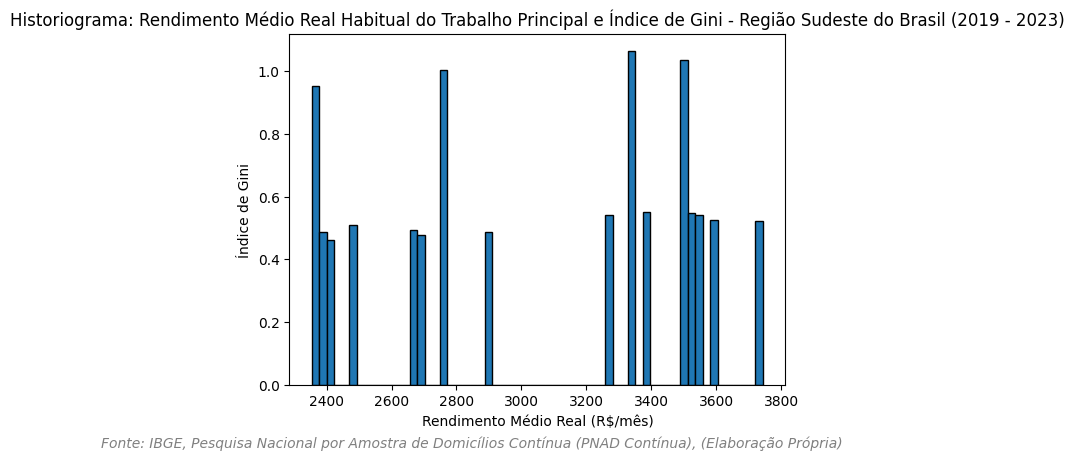

In [ ]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['índice gini'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e Índice de Gini - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Real (R$/mês)")
plt.ylabel("Índice de Gini")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()


É possível observar que esse resultado indica uma correlação positiva entre as variáveis 'rendimento médio real habitual do trabalho principal' e 'índice gini'. Estatisticamente, isso implica que de um modo geral o deslocamente do rendimento médio está fortemente acompanhada por um deslocamento também na concentração de renda e na desigualdade (visto que um índice gini mais alto significa maior desigualdade). Portanto, o crescimento do rendimento não está sendo distribuído de forma homogênea, mas sim sendo concentrado nos estratos superiores.


---



### Colunas "rendimento médio real habitual do trabalho principal(r$/mês)" e "taxa de analfabetismo"

In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['taxa de analfabetismo'])
print(correlation_value)

-0.9412230738890566


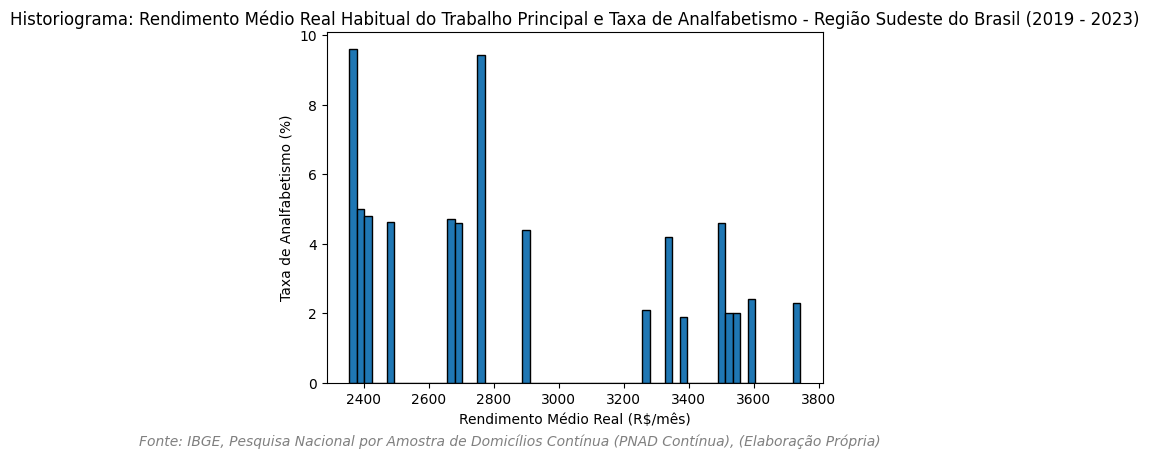

In [ ]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['taxa de analfabetismo'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e Taxa de Analfabetismo - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Real (R$/mês)")
plt.ylabel("Taxa de Analfabetismo (%)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()


Através dessa correlação é possível observar que o nível de educação básica da população é um fator importante para determinar a sua capacidade de geração de renda. Desta forma, é possível concluir que o rendimento real do trabalho é majoritariamente proveniente da população alfabetizada, em razão da forte correlação negativa entre as variáveis que torna a obtenção de um alto rendimento real pouco relacionado a pessoas analfabetas.


---





### Colunas "população ocupada em trabalhos formais", "ensino superior completo" e rendimento médio real habitual do trabalho principal(r$/mês)

In [ ]:
correlation_value = database['população ocupada em trabalhos formais'].corr(database['ensino superior completo'])
print(correlation_value)

0.4533473159195584


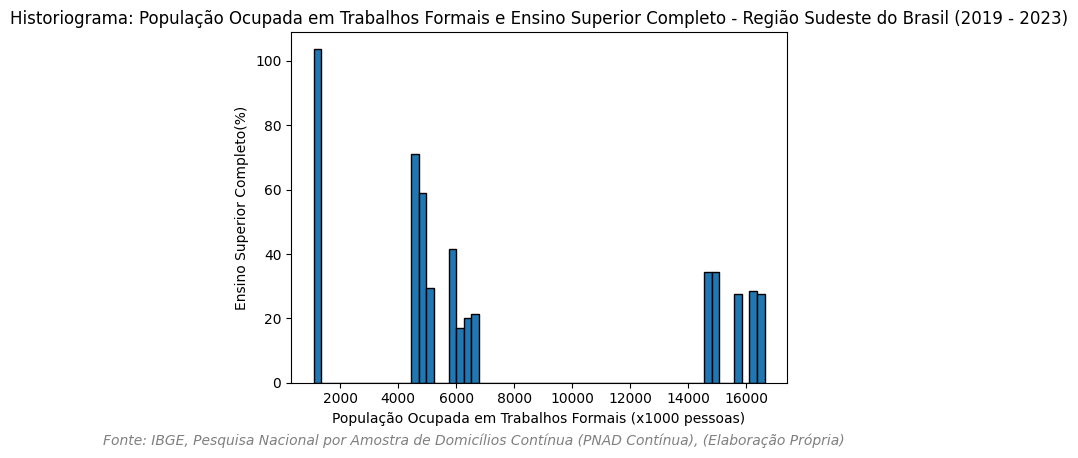

In [ ]:
plt.hist(
    database['população ocupada em trabalhos formais'],
    weights=database['ensino superior completo'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: População Ocupada em Trabalhos Formais e Ensino Superior Completo - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("População Ocupada em Trabalhos Formais (x1000 pessoas)")
plt.ylabel("Ensino Superior Completo(%)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()


In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['população ocupada em trabalhos formais'])
print(correlation_value)

0.566420981627062


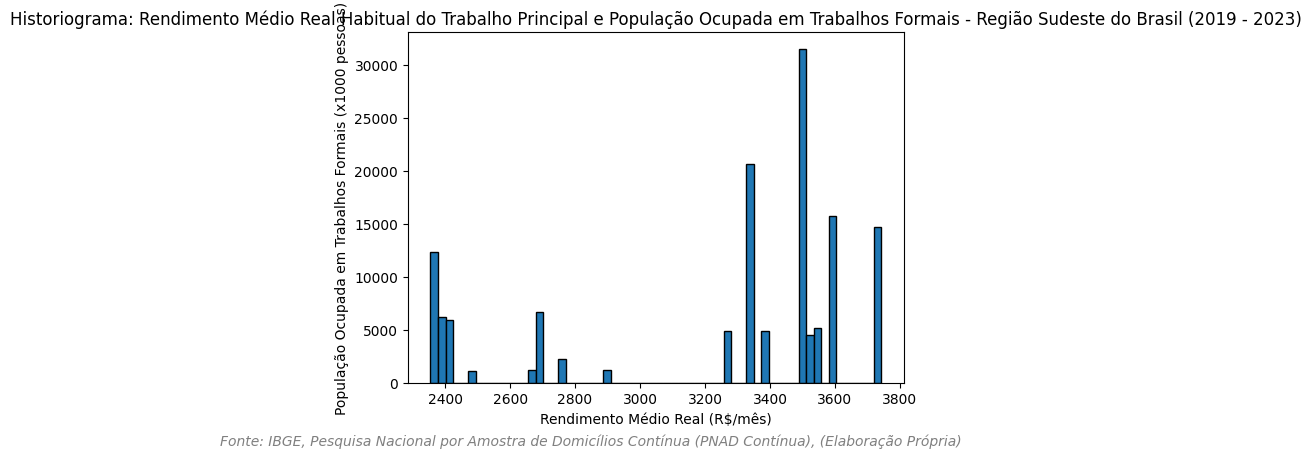

In [ ]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['população ocupada em trabalhos formais'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e População Ocupada em Trabalhos Formais - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Real (R$/mês)")
plt.ylabel("População Ocupada em Trabalhos Formais (x1000 pessoas)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()


Mediante essas correlações positivas é possível análisar que a população ocupada em empregos formais é significantemente composta por indivíduos com ensino superior completo. Portanto, o nível superior está muito associado a ocupações de maior qualificação e, consequentemente, melhores postos de trabalho formal, que tendem a pagar os maiores rendimentos médios, como também é possível observar a correlação considerável entre rendimento médio e população ocupada em trabalhos formais.


---



### Colunas "rendimento médio real habitual do trabalho principal(r$/mês)", "proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)" e "15 a 29 anos"

In [ ]:
correlation_value = database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].corr(database['15 a 29 anos'])
print(correlation_value)

-0.4535493827169528


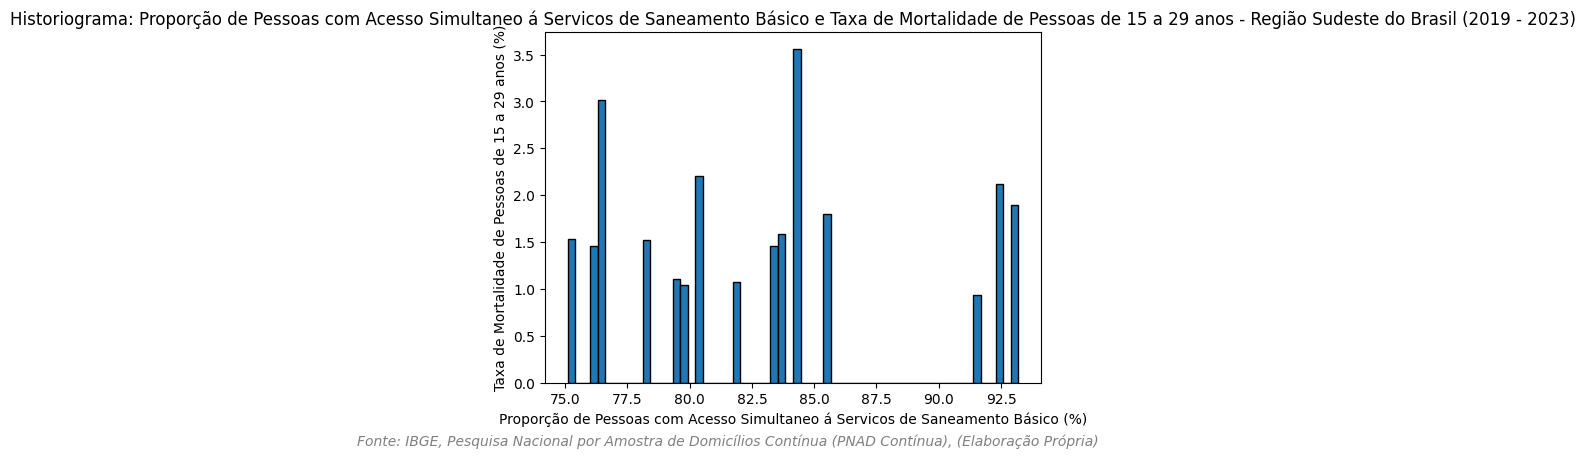

In [ ]:
plt.hist(
    database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'],
    weights=database['15 a 29 anos'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Proporção de Pessoas com Acesso Simultaneo á Servicos de Saneamento Básico e Taxa de Mortalidade de Pessoas de 15 a 29 anos - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Proporção de Pessoas com Acesso Simultaneo á Servicos de Saneamento Básico (%)")
plt.ylabel("Taxa de Mortalidade de Pessoas de 15 a 29 anos (%)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()


In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'])
print(correlation_value)

0.784883866755588


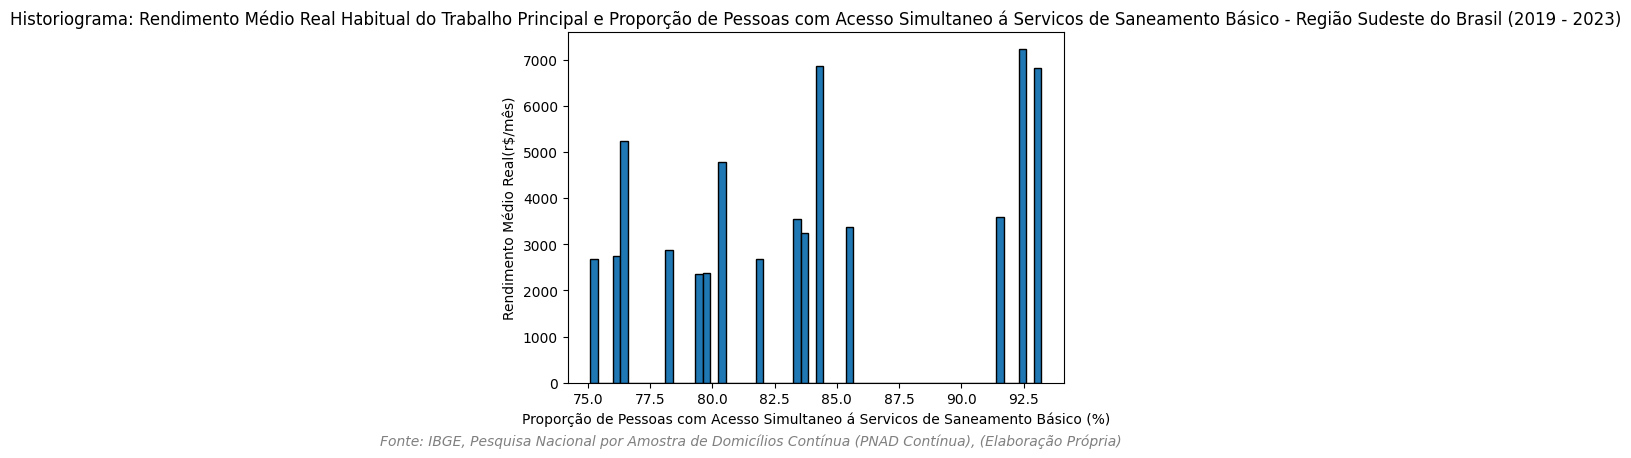

In [ ]:
plt.hist(
    database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'],
    weights=database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e Proporção de Pessoas com Acesso Simultaneo á Servicos de Saneamento Básico - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Proporção de Pessoas com Acesso Simultaneo á Servicos de Saneamento Básico (%)")
plt.ylabel("Rendimento Médio Real(r$/mês)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

A análise de correlação negativa indica que o aumento na proporção de acesso a serviços de saneamento básico está associado a uma redução na taxa de mortalidade de indivíduos de 15 a 29 anos. Estatisticamente, este resultado permite concluir que o investimento em saneamento básico melhora diretamente a qualidade de vida da população. <br> <br>
Além disso, de um modo geral um alto rendimento médio está significativamente associado a um maior acesso a serviços de saneamento básico. Essa correlação sugere que uma melhor condição de renda facilita e proporciona o acesso a serviços essenciais de infraestrutura.


---



### Colunas "rendimento médio real habitual do trabalho principal(r$/mês)", "número de beneficiários de plano de saúde", "15 a 29 anos", "30 a 44 anos" e "população desocupada"

In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['número de beneficiários de plano de saúde'])
print(correlation_value)

0.699720520502685


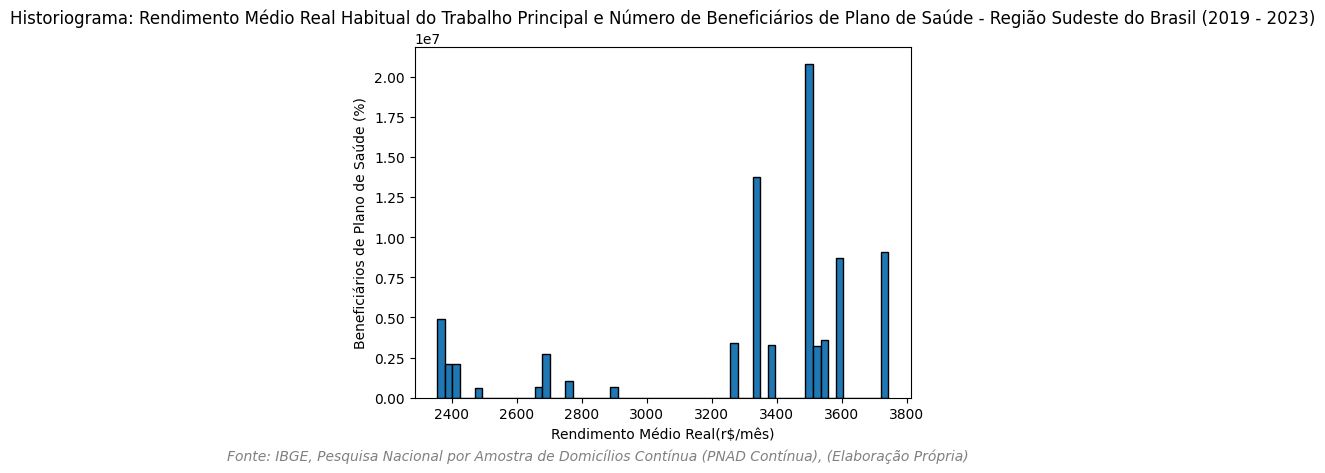

In [ ]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['número de beneficiários de plano de saúde'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e Número de Beneficiários de Plano de Saúde - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Real(r$/mês)")
plt.ylabel("Beneficiários de Plano de Saúde (%)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

In [ ]:
correlation_value = database['15 a 29 anos'].corr(database['número de beneficiários de plano de saúde'])
print(correlation_value)

-0.5764574384282947


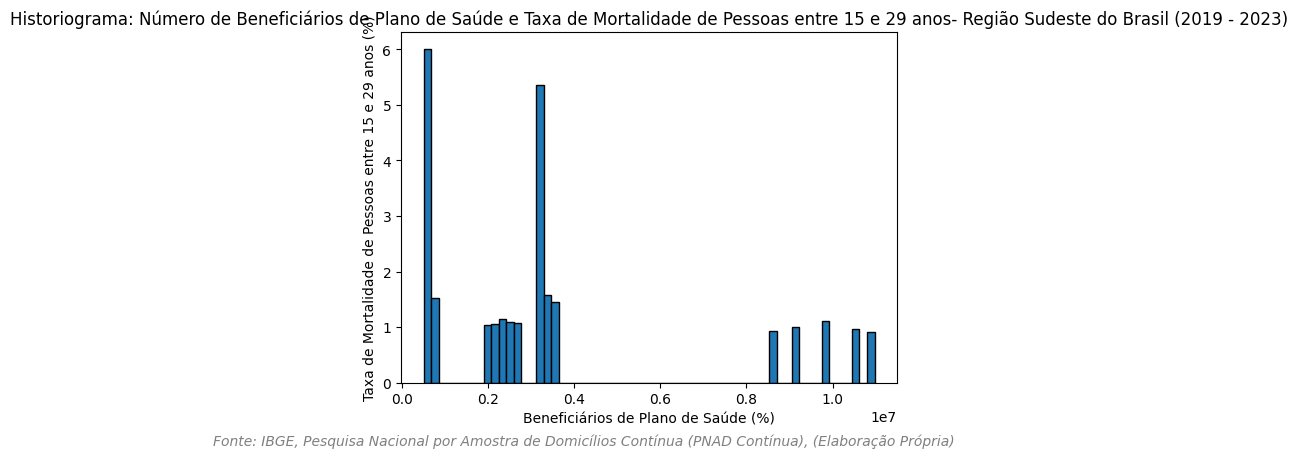

In [ ]:
plt.hist(
    database['número de beneficiários de plano de saúde'],
    weights=database['15 a 29 anos'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Número de Beneficiários de Plano de Saúde e Taxa de Mortalidade de Pessoas entre 15 e 29 anos- Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Beneficiários de Plano de Saúde (%)")
plt.ylabel("Taxa de Mortalidade de Pessoas entre 15 e 29 anos (%)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

In [ ]:
correlation_value = database['30 a 44 anos'].corr(database['número de beneficiários de plano de saúde'])
print(correlation_value)

-0.1549466234043241


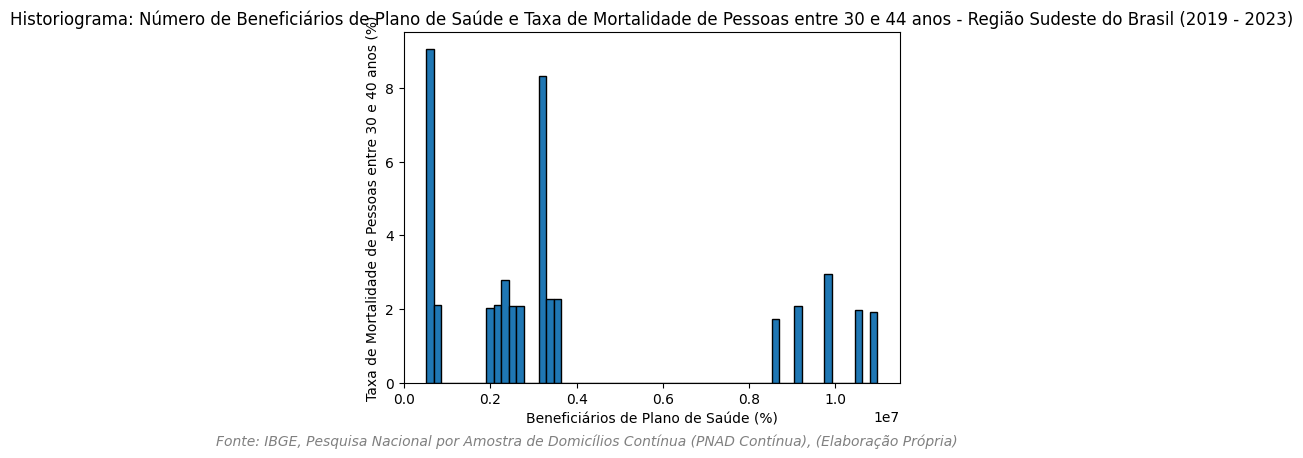

In [ ]:
plt.hist(
    database['número de beneficiários de plano de saúde'],
    weights=database['30 a 44 anos'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Número de Beneficiários de Plano de Saúde e Taxa de Mortalidade de Pessoas entre 30 e 44 anos - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Beneficiários de Plano de Saúde (%)")
plt.ylabel("Taxa de Mortalidade de Pessoas entre 30 e 40 anos (%)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

In [ ]:
correlation_value = database['população desocupada'].corr(database['número de beneficiários de plano de saúde'])
print(correlation_value)

0.881457964618781


Diante dessas correlações é possível identificar uma forte correlação positiva entre o rendimento médio real do trabalho e o número de beneficiários de planos de saúde. Isso indica que um rendimento elevado influencia diretamente a proporção de pessoas com acesso a benefícios de saúde privada. Complementarmente, a correlação negativa observada entre o número de beneficiários de planos de saúde e a taxa de mortalidade na faixa etária de 15 a 44 anos sugere que o aumento do acesso a esses planos contribui para a redução da mortalidade, promovendo uma melhor qualidade de vida e saúde para a população.


---



### Colunas "rendimento médio real habitual do trabalho principal(r$/mês)", "total pessoas por condição de ocupação a domicílio(1 000 pessoas)", "domicilio alugado"

In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['total pessoas por condição de ocupação a domicílio(1 000 pessoas)'])
print(correlation_value)

0.5701360617456378


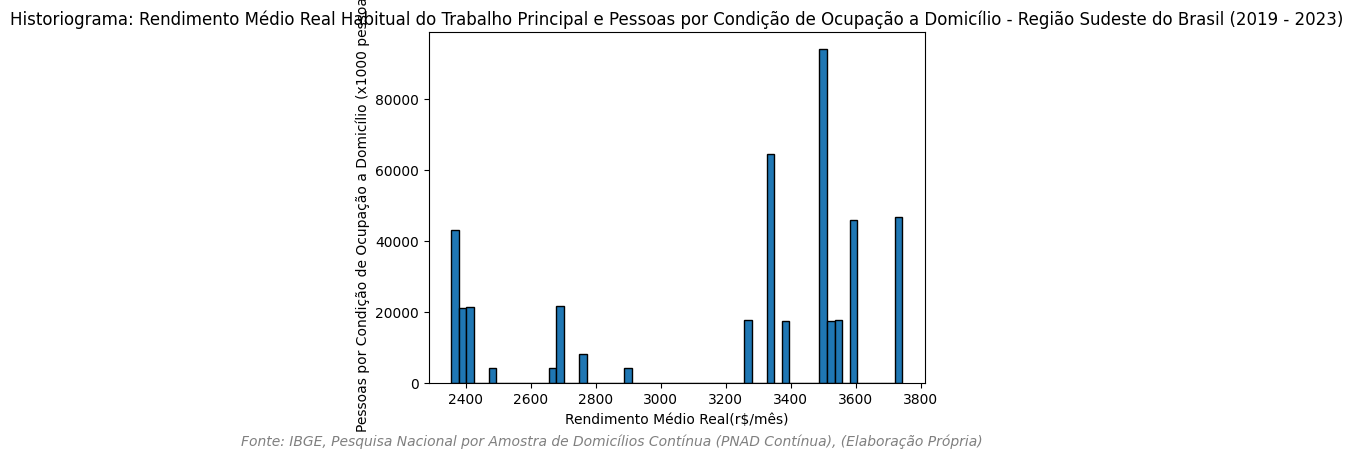

In [ ]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['total pessoas por condição de ocupação a domicílio(1 000 pessoas)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e Pessoas por Condição de Ocupação a Domicílio - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Real(r$/mês)")
plt.ylabel("Pessoas por Condição de Ocupação a Domicílio (x1000 pessoas)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

In [ ]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['domicílio alugado'])
print(correlation_value)

0.602805914140175


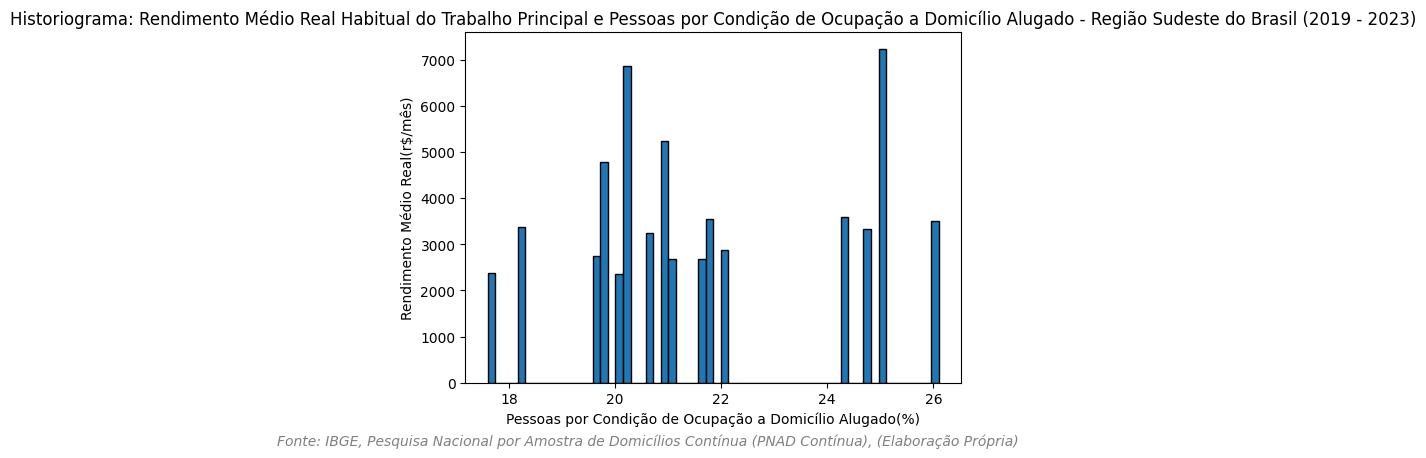

In [ ]:
plt.hist(
    database['domicílio alugado'],
    weights=database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Real Habitual do Trabalho Principal e Pessoas por Condição de Ocupação a Domicílio Alugado - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Pessoas por Condição de Ocupação a Domicílio Alugado(%)")
plt.ylabel("Rendimento Médio Real(r$/mês)")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

A correlação positiva entre o 'rendimento médio real habitual do trabalho principal' e o 'total de pessoas em ocupação a domicílio' sugere que rendimentos mais elevados viabilizam ou estão associados a condições de moradia em um domicílio. Paralelamente, o rendimento médio real também está positivamente relacionado à taxa de pessoas que possuem domicílio alugado. Essa última correlação indica que o crescimento do rendimento real proporciona à população a capacidade financeira de acessar o mercado de aluguel, o que pode ser interpretado como um indicador de mobilidade e capacidade de escolha de moradia.


---



As análises realizadas demonstram que o índice de rendimento real do trabalho possui uma alta correlação com diversos indicadores socioeconômicos cruciais, englobando as áreas de saúde, educação, mercado de trabalho e moradia. Diante da sua relevância e capacidade preditiva, esta variável será estabelecida como o eixo central para a avaliação e a previsão do índice de interesse.

# **6.** Avaliação e Classificação da Base de Dados
<a id="avaliacao"></a>

In [ ]:
print(database.columns.tolist())


['estado', 'ano', 'rendimento médio real habitual do trabalho principal(r$/mês)', 'rendimento médio real habitual de todos os trabalhos(r$/mês)', 'rendimento-hora médio real habitual do trabalho principal(r$/hora)', 'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)', 'população em idade de trabalhar', 'população na força de trabalho', 'população ocupada', 'população ocupada em trabalhos formais', 'população desocupada', 'população na força de trabalho potencial', 'população subutilizada', 'taxa de participação', 'nível de ocupação', 'taxa de formalização', 'taxa de desocupação', 'taxa composta de subutilização', 'índice gini', 'total pessoas ocupadas(1 000 pessoas)', 'sem instrução ou fundamental incompleto', 'ensino fundamental completo ou médio incompleto', 'ensino médio completo ou superior incompleto', 'ensino superior completo', 'população', 'saneamento basico total(1 000 pessoas)', 'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básic

## Cálculo dos Pesos das Variáveis em Correlação com a Coluna 'rendimento médio real habitual do trabalho principal(r$/mês)'

In [ ]:
variaveis = [
    'rendimento médio real habitual do trabalho principal(r$/mês)',
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'total pessoas ocupadas(1 000 pessoas)',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    '0 a 14 anos',
    '15 a 29 anos',
    '30 a 44 anos',
    '45 a 59 anos',
    '60 anos ou mais',
    '60 a 69 anos',
    '70 anos ou mais',
    'número mensal médio de leitos de internação (total)',
    'número de beneficiários de plano de saúde',
    'total pessoas por condição de ocupação a domicílio(1 000 pessoas)',
    'domicílio próprio - já pago',
    'domicílio próprio - pagando',
    'domicílio alugado',
    'domicílio cedido por empregador',
    'domicílio cedido por familiar',
    'domicílio cedido de outra forma',
    'outra forma'
]

scaler = MinMaxScaler()
df_norm = database.copy()
df_norm[variaveis] = scaler.fit_transform(df_norm[variaveis])

corrs = df_norm[variaveis].corr()['rendimento médio real habitual do trabalho principal(r$/mês)'].abs()

pesos = corrs / corrs.sum()

print("Pesos calculados com base nas correlações:")
print(pesos)


Pesos calculados com base nas correlações:
rendimento médio real habitual do trabalho principal(r$/mês)                            0.041463
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.041431
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.040986
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0.041069
população em idade de trabalhar                                                         0.023885
população na força de trabalho                                                          0.023319
população ocupada                                                                       0.022465
população ocupada em trabalhos formais                                                  0.023486
população desocupada                                                                    0.027102
população na força de trabalho potencial                                            

## Classificação dos Índices Socioeconômicos para Cada Estado

In [ ]:
df_norm['indice_socioeconomico'] = (df_norm[variaveis] * pesos).sum(axis=1)

df_norm['indice_socioeconomico'] = (df_norm['indice_socioeconomico'] - df_norm['indice_socioeconomico'].min()) / \
                                   (df_norm['indice_socioeconomico'].max() - df_norm['indice_socioeconomico'].min())

df_norm['classificacao'] = pd.cut(df_norm['indice_socioeconomico'],
                                  bins=[0, 0.33, 0.66, 1],
                                  labels=['baixo', 'médio', 'alto'])
df_norm.dropna(inplace=True)
print("\nÍndice socioeconômico calculado:")
print(df_norm[['estado', 'indice_socioeconomico', 'classificacao']].sort_values(by='indice_socioeconomico', ascending=False))



Índice socioeconômico calculado:
            estado  indice_socioeconomico classificacao
17       São Paulo               1.000000          alto
16       São Paulo               0.961420          alto
15       São Paulo               0.927643          alto
19       São Paulo               0.855103          alto
18       São Paulo               0.833426          alto
12  Rio de Janeiro               0.489320         médio
11  Rio de Janeiro               0.482847         médio
14  Rio de Janeiro               0.370481         médio
10  Rio de Janeiro               0.351061         médio
13  Rio de Janeiro               0.324961         baixo
7     Minas Gerais               0.206842         baixo
9     Minas Gerais               0.189914         baixo
6     Minas Gerais               0.147668         baixo
8     Minas Gerais               0.134188         baixo
5     Minas Gerais               0.133174         baixo
1   Espírito Santo               0.044789         baixo
2   Espírito S

## Visualização Gráfica das Classificações

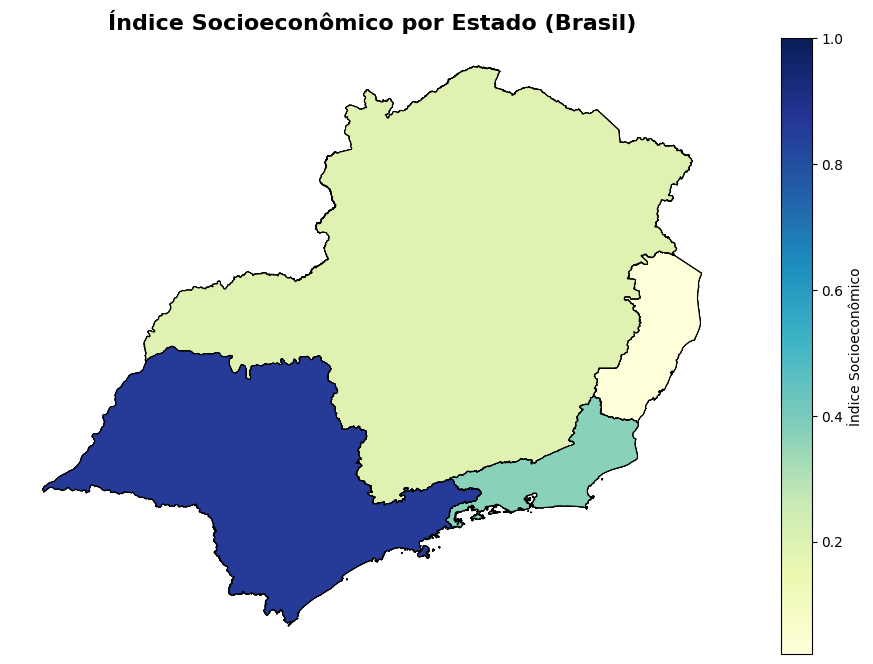

In [ ]:
brasil_estados = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")
brasil_estados['estado'] = brasil_estados['name'].str.strip()

mapa = brasil_estados.merge(df_norm, on='estado', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(
    column='indice_socioeconomico',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Índice Socioeconômico", 'orientation': "vertical"},
    ax=ax
)
plt.title("Índice Socioeconômico por Estado (Brasil)", fontsize=16, weight='bold')
plt.axis('off')
plt.show()

# **7.** Aplicação de Modelos de Previsão na Base de Dados
<a id="modelo"></a>

## Previsão das Variáveis

In [ ]:
variavel_alvo = 'rendimento médio real habitual do trabalho principal(r$/mês)'

variaveis_exp = [
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    'número de beneficiários de plano de saúde'
]

scaler = MinMaxScaler()
df_norm = database.copy()
df_norm[variaveis_exp + [variavel_alvo]] = scaler.fit_transform(df_norm[variaveis_exp + [variavel_alvo]])

X = df_norm[variaveis_exp]
y = df_norm[variavel_alvo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Utilizando o Modelo de Regressão Linear

In [ ]:
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

coeficientes = pd.DataFrame({
    'Variável': variaveis_exp,
    'Coeficiente': modelo_linear.coef_
}).sort_values(by='Coeficiente', ascending=False)

r2_treino = modelo_linear.score(X_train, y_train)
r2_teste = modelo_linear.score(X_test, y_test)

print("Intercepto:", modelo_linear.intercept_)
print("\nCoeficientes da Regressão Linear:\n", coeficientes)
print("\nR² (treino):", r2_treino)
print("R² (teste):", r2_teste)

y_pred = modelo_linear.predict(X_test)
print("\nPrimeiras previsões:", y_pred[:11])
print("Valores reais:", y_test.head().values)
print("MAE:",  mean_absolute_error(y_test, y_pred))


Intercepto: -0.021734926127762066

Coeficientes da Regressão Linear:
                                              Variável  Coeficiente
0   rendimento médio real habitual de todos os tra...     0.485424
15                                        índice gini     0.375344
12                               taxa de formalização     0.316949
2   rendimento-hora médio real habitual de todos o...     0.144692
8            população na força de trabalho potencial     0.144500
1   rendimento-hora médio real habitual do trabalh...     0.120223
23                              taxa de analfabetismo     0.048082
16            sem instrução ou fundamental incompleto     0.033212
7                                população desocupada     0.029866
20                                          população     0.023182
9                              população subutilizada     0.021211
24                             taxa total mortalidade     0.015788
21             saneamento basico total(1 000 pessoas)     0

### Importando os resultados

In [ ]:
variaveis_linear = pd.DataFrame({
    'Métrica': ['Intercepto', 'R² (Treino)', 'R² (Teste)'] + ['Previsão ' + str(i+1) for i in range(5)] + ['Valor Real ' + str(i+1) for i in range(5)],
    'Valor': [modelo_linear.intercept_, r2_treino, r2_teste] + list(y_pred[:5]) + list(y_test.head().values)
})
with pd.ExcelWriter('variaveis_linear.xlsx') as writer:
    coeficientes.to_excel(writer, sheet_name='Coeficientes', index=False)
    variaveis_linear.to_excel(writer, sheet_name='Variáveis Linear', index=False)

#from google.colab import files
#files.download('variaveis_linear.xlsx')
variaveis_linear.to_excel('variaveis_linear.xlsx', index=False)
variaveis_linear.to_csv('variaveis_linear.csv', index=False)

### Utilizando o Modelo Random Forest Regressor

In [ ]:
modelo_rf = RandomForestRegressor(n_estimators=300, random_state=42)
modelo_rf.fit(X_train, y_train)

importancias = pd.DataFrame({
    'Variável': variaveis_exp,
    'Importância': modelo_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)

y_pred_train = modelo_rf.predict(X_train)
y_pred_test = modelo_rf.predict(X_test)

r2_treino = r2_score(y_train, y_pred_train)
r2_teste = r2_score(y_test, y_pred_test)

print("R² (treino):", r2_treino)
print("R² (teste):", r2_teste)

print("\nImportância das variáveis:\n", importancias)
print("\nPrimeiras previsões:", y_pred_test[:11])
print("Valores reais:", y_test.head().values)
print("MAE:",  mean_absolute_error(y_test, y_pred_test))


R² (treino): 0.9871813312216788
R² (teste): 0.904398629265374

Importância das variáveis:
                                              Variável  Importância
17    ensino fundamental completo ou médio incompleto     0.223742
23                              taxa de analfabetismo     0.151899
16            sem instrução ou fundamental incompleto     0.088287
2   rendimento-hora médio real habitual de todos o...     0.085974
19                           ensino superior completo     0.072357
1   rendimento-hora médio real habitual do trabalh...     0.058743
22  proporção de pessoas com acesso simultâneo aos...     0.052433
0   rendimento médio real habitual de todos os tra...     0.050893
18       ensino médio completo ou superior incompleto     0.045813
12                               taxa de formalização     0.045203
25          número de beneficiários de plano de saúde     0.032787
15                                        índice gini     0.032367
7                                popul

### Importando os Resultados

In [ ]:
variaveis_rf = pd.DataFrame({
    'Métrica': ['Intercepto', 'R² (Treino)', 'R² (Teste)'] + ['Previsão ' + str(i+1) for i in range(5)] + ['Valor Real ' + str(i+1) for i in range(5)],
    'Valor': [modelo_linear.intercept_, r2_treino, r2_teste] + list(y_pred[:5]) + list(y_test.head().values)
})
with pd.ExcelWriter('variaveis_rf.xlsx') as writer:
    coeficientes.to_excel(writer, sheet_name='Coeficientes', index=False)
    variaveis_rf.to_excel(writer, sheet_name='Variáveis Random Forest', index=False)

#from google.colab import files
#files.download('variaveis_rf.xlsx')
variaveis_rf.to_csv('variaveis_rf.csv', index=False)
variaveis_rf.to_csv('variaveis_rf.csv', index=False)

## Previsão de Índices Socioeconômicos por Estado



In [ ]:
variaveis = [
    'rendimento médio real habitual do trabalho principal(r$/mês)',
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'total pessoas ocupadas(1 000 pessoas)',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    '0 a 14 anos',
    '15 a 29 anos',
    '30 a 44 anos',
    '45 a 59 anos',
    '60 anos ou mais',
    '60 a 69 anos',
    '70 anos ou mais',
    'número mensal médio de leitos de internação (total)',
    'número de beneficiários de plano de saúde',
    'total pessoas por condição de ocupação a domicílio(1 000 pessoas)',
    'domicílio próprio - já pago',
    'domicílio próprio - pagando',
    'domicílio alugado',
    'domicílio cedido por empregador',
    'domicílio cedido por familiar',
    'domicílio cedido de outra forma',
    'outra forma'
]

scaler = MinMaxScaler()
df_norm = database.copy()
df_norm[variaveis] = scaler.fit_transform(df_norm[variaveis])

corrs = df_norm[variaveis].corr()['rendimento médio real habitual do trabalho principal(r$/mês)'].abs()
pesos = corrs / corrs.sum()
df_norm['indice_socioeconomico'] = (df_norm[variaveis] * pesos).sum(axis=1)
df_norm['indice_socioeconomico'] = (df_norm['indice_socioeconomico'] - df_norm['indice_socioeconomico'].min()) / \
                                   (df_norm['indice_socioeconomico'].max() - df_norm['indice_socioeconomico'].min())

X = df_norm[variaveis]
y = df_norm['indice_socioeconomico']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Utilizando o Modelo de Regressão Linear

In [ ]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred_linear = reg_linear.predict(X_test)

### Utilizando o Modelo Random Forest Regressor

In [ ]:
reg_rf = RandomForestRegressor(n_estimators=300, random_state=42)
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)

# **8.** Resultados
<a id="resultado"></a>

## Visualização das Variáveis que Causam Mais Impacto no Índice Socioeconômico

### Modelo de Regressão Linear

C:\Users\guilh\AppData\Local\Temp\ipykernel_8096\179338759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeficientes.head(10), y='Variável', x='Coeficiente', palette='viridis')


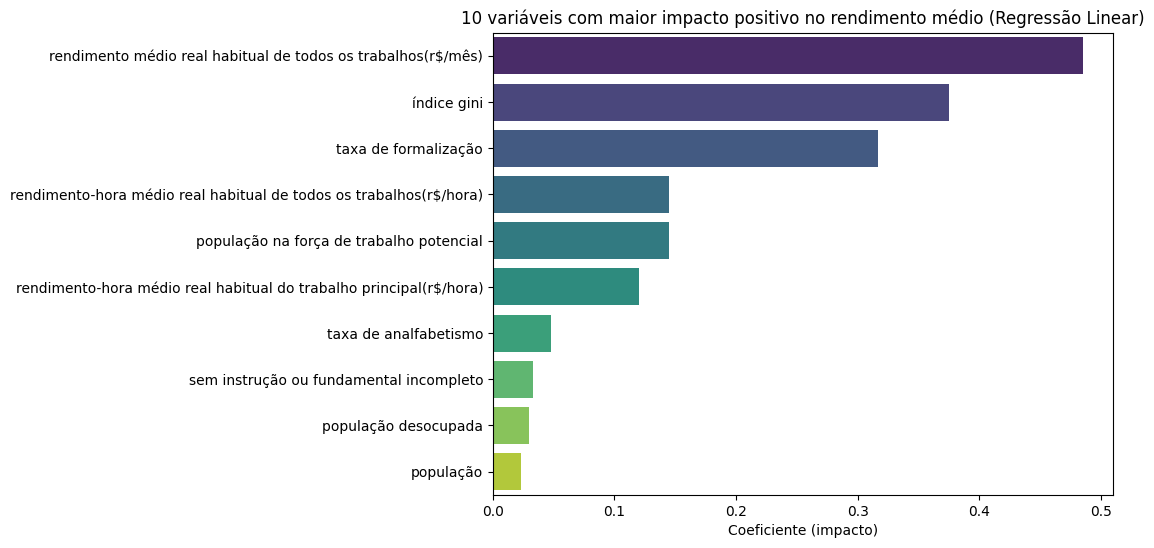

C:\Users\guilh\AppData\Local\Temp\ipykernel_8096\179338759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeficientes.tail(10), y='Variável', x='Coeficiente', palette='rocket')


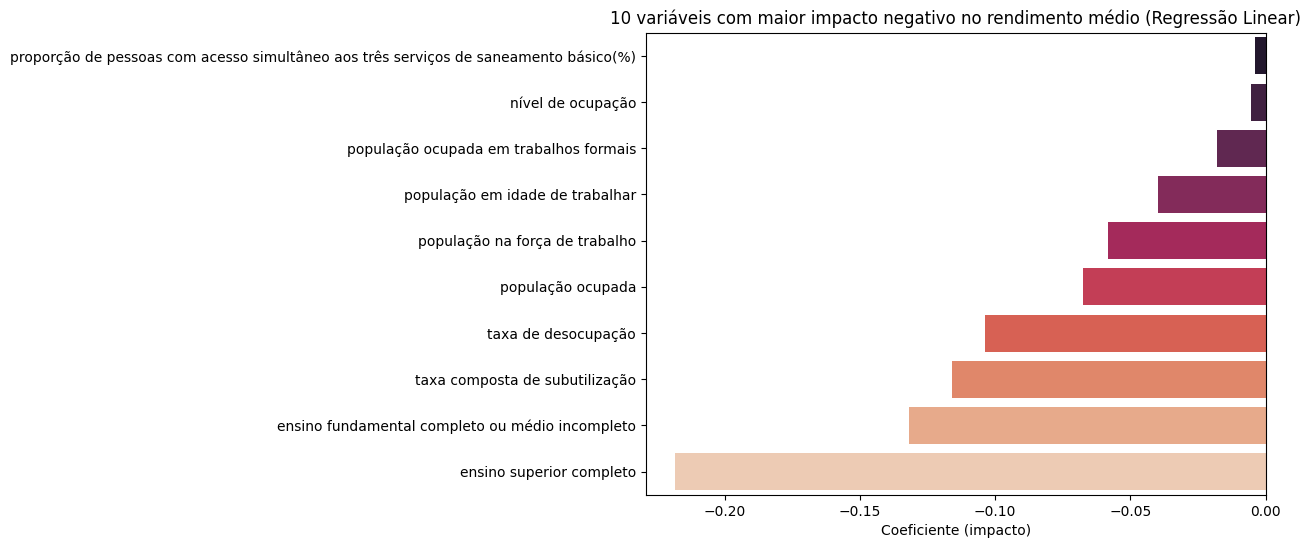

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=coeficientes.head(10), y='Variável', x='Coeficiente', palette='viridis')
plt.title('10 variáveis com maior impacto positivo no rendimento médio (Regressão Linear)')
plt.xlabel('Coeficiente (impacto)')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=coeficientes.tail(10), y='Variável', x='Coeficiente', palette='rocket')
plt.title('10 variáveis com maior impacto negativo no rendimento médio (Regressão Linear)')
plt.xlabel('Coeficiente (impacto)')
plt.ylabel('')
plt.show()

### Modelo Random Forest Regressor

C:\Users\guilh\AppData\Local\Temp\ipykernel_8096\1066451132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias.head(10), y='Variável', x='Importância', palette='mako')


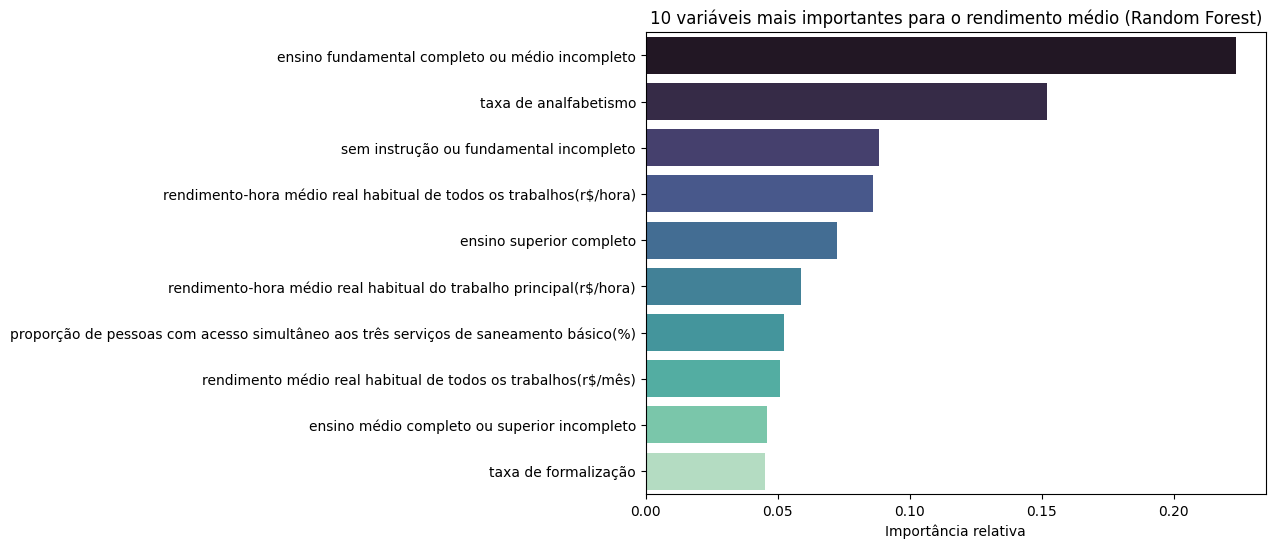

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=importancias.head(10), y='Variável', x='Importância', palette='mako')
plt.title('10 variáveis mais importantes para o rendimento médio (Random Forest)')
plt.xlabel('Importância relativa')
plt.ylabel('')
plt.show()

## Comparando os Resultado dos Dois Modelos de Previsão, Regressão Linear e Ramdom Forest Regressor

In [ ]:
df_pred = df_norm[['estado']].copy()
df_pred['indice_real'] = y
df_pred['indice_previsto_linear'] = reg_linear.predict(X)
df_pred['indice_previsto_rf'] = reg_rf.predict(X)

display(df_pred.sort_values(by='indice_real', ascending=False))

,estado,indice_real,indice_previsto_linear,indice_previsto_rf
17,São Paulo,1.000000,1.006882,0.794931
16,São Paulo,0.961420,0.961420,0.863393
15,São Paulo,0.927643,0.873743,0.792344
19,São Paulo,0.855103,0.855103,0.805811
18,São Paulo,0.833426,0.833426,0.810845
12,Rio de Janeiro,0.489320,0.489320,0.458213
11,Rio de Janeiro,0.482847,0.482847,0.466111
14,Rio de Janeiro,0.370481,0.370481,0.361959
10,Rio de Janeiro,0.351061,0.351061,0.375634
13,Rio de Janeiro,0.324961,0.324961,0.353870


### Importando os Resultados

In [ ]:
df_valores = df_pred.sort_values(by='indice_real', ascending=False).head(10)
df_pred['indice_previsto_rf'] = reg_rf.predict(X)
df_pred.to_excel('resultados_completos.xlsx', index=False)

#from google.colab import files
#files.download('resultados_completos.xlsx')

## Visualização Gráfica das Previsões dos Dois Modelos

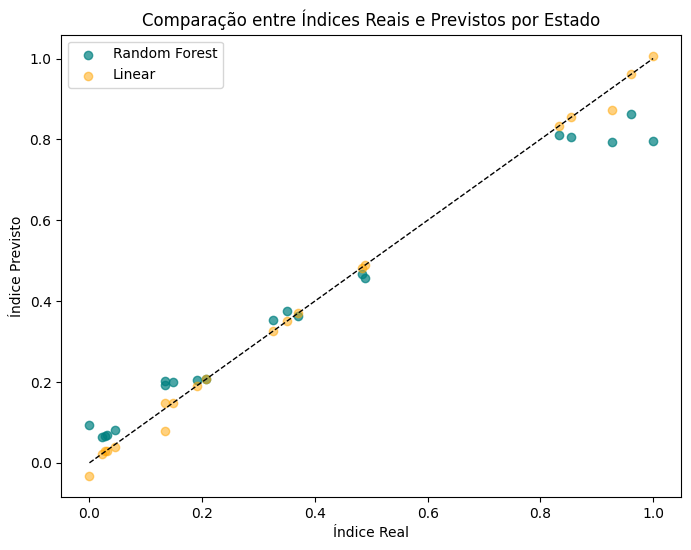

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_pred['indice_real'], df_pred['indice_previsto_rf'], color='teal', alpha=0.7, label='Random Forest')
plt.scatter(df_pred['indice_real'], df_pred['indice_previsto_linear'], color='orange', alpha=0.5, label='Linear')
plt.plot([0,1],[0,1], 'k--', lw=1)
plt.xlabel("Índice Real")
plt.ylabel("Índice Previsto")
plt.title("Comparação entre Índices Reais e Previstos por Estado")
plt.legend()
plt.show()

## Classificação da Distribuição dos Índices Previstos

### Previsões do Modelo de Regressão Linear

In [ ]:
df_pred['indice_previsto_linear'] = (df_pred['indice_previsto_linear'] - df_pred['indice_previsto_linear'].min()) / \
                                   (df_pred['indice_previsto_linear'].max() - df_pred['indice_previsto_linear'].min())

df_pred['classificacao'] = pd.cut(df_pred['indice_previsto_linear'],
                                  bins=[0, 0.33, 0.66, 1],
                                  labels=['baixo', 'médio', 'alto'])
df_pred.dropna(inplace=True)
print("\nÍndice socioeconômico calculado:")
print(df_pred[['estado', 'indice_previsto_linear', 'classificacao']].sort_values(by='indice_previsto_linear', ascending=False))



Índice socioeconômico calculado:
            estado  indice_previsto_linear classificacao
17       São Paulo                1.000000          alto
16       São Paulo                0.956235          alto
15       São Paulo                0.871832          alto
19       São Paulo                0.853888          alto
18       São Paulo                0.833021          alto
12  Rio de Janeiro                0.501763         médio
11  Rio de Janeiro                0.495532         médio
14  Rio de Janeiro                0.387361         médio
10  Rio de Janeiro                0.368666         médio
13  Rio de Janeiro                0.343541         médio
7     Minas Gerais                0.229832         baixo
9     Minas Gerais                0.213536         baixo
6     Minas Gerais                0.172867         baixo
8     Minas Gerais                0.172013         baixo
5     Minas Gerais                0.105581         baixo
1   Espírito Santo                0.067694         bai

### Previsões do Modelo Random Forest Regressor

In [ ]:
df_pred['indice_previsto_rf'] = (df_pred['indice_previsto_rf'] - df_pred['indice_previsto_rf'].min()) / \
                                   (df_pred['indice_previsto_rf'].max() - df_pred['indice_previsto_rf'].min())

df_pred['classificacao'] = pd.cut(df_pred['indice_previsto_rf'],
                                  bins=[0, 0.33, 0.66, 1],
                                  labels=['baixo', 'médio', 'alto'])
df_pred.dropna(inplace=True)
print("\nÍndice socioeconômico calculado:")
print(df_pred[['estado', 'indice_previsto_rf', 'classificacao']].sort_values(by='indice_previsto_rf', ascending=False))



Índice socioeconômico calculado:
            estado  indice_previsto_rf classificacao
16       São Paulo            1.000000          alto
18       São Paulo            0.934178          alto
19       São Paulo            0.927872          alto
17       São Paulo            0.914244          alto
15       São Paulo            0.911004          alto
11  Rio de Janeiro            0.502361         médio
12  Rio de Janeiro            0.492468         médio
10  Rio de Janeiro            0.389027         médio
14  Rio de Janeiro            0.371898         médio
13  Rio de Janeiro            0.361766         médio
7     Minas Gerais            0.179059         baixo
9     Minas Gerais            0.174581         baixo
5     Minas Gerais            0.170527         baixo
6     Minas Gerais            0.167758         baixo
8     Minas Gerais            0.159594         baixo
1   Espírito Santo            0.021088         baixo
2   Espírito Santo            0.005254         baixo
3   Espírito

### Importação dos Resultados

In [ ]:
resultado_impresso = df_pred[['estado', 'indice_previsto_linear', 'classificacao']].sort_values(by='indice_previsto_linear', ascending=False)
resultado_impresso.to_excel('indice_socioeconomico.xlsx', index=False)

#from google.colab import files
#files.download('indice_socioeconomico.xlsx')

## Erro Médio Absoluto (MAE) e Coeficiente de Determinação de Cada Modelo (R²)

### Modelo de Regressão Linear

In [ ]:
print("Regressão Linear:")
print("  MAE:", mean_absolute_error(y_test, y_pred_linear))
print("  R²:", r2_score(y_test, y_pred_linear))

Regressão Linear:
  MAE: 0.027842535969301096
  R²: 0.9931845311122591


### Modelo Random Forest Regressor

In [ ]:
print("\nRandom Forest Regressor:")
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))
print("  R²:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
  MAE: 0.09939043887785819
  R²: 0.926255957710865


# **9.** Conclusões
<a id="conclusao"></a>

## Modelagem e Selação da Variável Chave

O ponto focal da análise exploratória inicial (EDA) foi a variável Renda Média Real ($RMR$) , que demonstrou uma forte correlação estatística e influência significativa em um conjunto de variáveis socioeconômicas, abrangendo domínios como trabalho, educação, saúde e habitação.Dada essa estrutura de covariância, a $RMR$ foi estabelecida como a variável primária para a construção de um Índice Socioeconômico Regional ($ISR$). A metodologia de ponderação de variáveis foi então aplicada, utilizando a magnitude do impacto (peso) de cada feature na $RMR$ para compor o $ISR$. <br> <br>
**Classificação do $ISR$ (Estudo de Caso - Região Sudeste):** <br>
A classificação resultante para os estados do Sudeste demonstrou uma validação conceitual, sendo: <br>
* Baixo $ISR$: Minas Gerais e Espírito Santo.
* Médio $ISR$: Rio de Janeiro.
* Alto $ISR$: São Paulo. <br>
Essa hierarquia corrobora a disparidade de desenvolvimento infraestrutural e a concentração de capital observadas, validando o $ISR$ como um indicador robusto.

## Análise de Importância de Variáveis

Procedeu-se à identificação das variáveis que exercem o maior score de importância (impacto positivo e negativo) na determinação do $ISR$ de uma região: <br><br>
**Impacto Positivo e Estrutural:**
Variáveis como o Coeficiente de Gini (indicador de desigualdade de renda), a Taxa de Formalização do Emprego e a Taxa de Alfabetismo são preditores chave. Estas variáveis capturam aspectos fundamentais do capital humano, da estrutura de mercado de trabalho e da equidade social, que são determinantes diretos da qualidade de vida regional. <br> <br>
**Impacto Negativo (Indicadores de Fragilidade)**: Variáveis como a População com Ensino Superior Completo, População com Ensino Fundamental Completo e a Taxa de Desocupação foram observadas como variáveis que influenciam negativamente. O Nível de Instrução Educacional da População é, em essência, um fator causal subjacente que modula outras variáveis como a taxa de ocupação, a qualidade da habitação e o acesso a benefícios de saúde, reforçando a hipótese central da educação como motor do $ISR$.A análise de fatores causais indicou que o nível de instrução (especialmente baixa taxa de analfabetismo e conclusão dos ensinos fundamental e superior) é o principal fator da $RMR$. Este achado confirma a ligação causal entre capital humano qualificado, melhor colocação no mercado de trabalho, e a consequente melhoria nas condições de moradia e acesso à saúde.

## Avaliação de Desempenho dos Modelos Preditivos

Foram comparados dois modelos de Aprendizado de Máquina Supervisionado para a predição da $RMR$ (ou do $ISR$): o Regressor Linear Múltiplo ($RL$) e o Random Forest Regressor ($RFR$).

No Erro Médio Absoluto (MAE), o Modelo de Regressor Linear obteve resultado $0.03446$, demonstrando um menor erro na identificação dos pesos de importância, quando comparado ao resultado do Modelo Random Forest, além disso, ao avaliar essa mesma métrica no teste de previsão, o RL apresentou uma performance preditiva significativamente superior comparada a este mesmo Modelo. Da mesma forma, o Coeficiente e Determinação (R²) do Regressor Linear, se revelou superior quando novamente comparado ao Random Forrest Regressor e ainda na Previsão do $ISR$ de teste, usando o Regressor Linear, sua capacidade explicativa foi 0,67% maior que o RFR. <br>

A superioridade do modelo de Regressão Linear ($RL$) na predição do $ISR$ foi comprovada através das métricas de erro. Um $MAE$ substancialmente menor no $RL$ ($0.02784$) e um $R^2$ muito próximo de 1 ($\mathbf{0.993}$) indicam que o $RL$ é o modelo mais parcimonioso e acurado para este dataset.A análise visual do Gráfico de Comparação entre Índices Reais e Previstos (disponível na análise primária) reitera esta análise: os pontos de previsão do $RL$ apresentam uma dispersão mínima em torno da linha de identidade (valor real = valor previsto), enquanto os pontos do $RFR$ demonstram maior viés e variância (mais dispersos).A validação cruzada da classificação de previsão (MG/ES: Baixo; RJ: Médio; SP: Alto) preservou a classificação inicial, solidificando a estabilidade do modelo $RL$ e a validade do $ISR$ proposto.

## Insigths

Os principais insights observados foram: <br>
* **A Educação como Fator Causal Primário:** O nível de instrução educacional da população (baixo analfabetismo, conclusão dos ensinos fundamental e superior) foi identificado como o principal fator da $RMR$ e, consequentemente, do $ISR$. Isso sugere que políticas públicas focadas em aprimoramento educacional e inclusão terão o maior efeito multiplicador na melhoria do índice socioeconômico e da qualidade de vida. <br><br>
* **Performance Preditiva:** O Modelo de Regressão Linear Múltiplo se estabeleceu como o melhor preditor do $ISR$ ($\mathbf{R^2 = 0.99318}$), superando o Random Forest. Isso indica que a relação entre as variáveis preditoras e a $RMR$ é predominantemente linear. <br> <br>
* **Validade Estrutural:** O $ISR$ proposto valida a hierarquia socioeconômica conhecida na Região Sudeste (SP > RJ > MG/ES), demonstrando que o índice é um instrumento de mensuração fidedigno para a alocação estratégica de recursos e o monitoramento do desenvolvimento regional.